In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 16.7 MB/s eta 0:00:00


# Loading the Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
df = pd.read_csv("AAPL.csv")

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


# Data Preprocessing

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
# Converting to date_time format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [ ]:
# setting date column as index
df.set_index('Date', inplace = True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
# sorting the index(Date Column) for maintaining sequential order
df.sort_index(inplace = True)

# Scaling the Values(Neural Networks, which often require inputs to be between 0 and 1.) and Standard Scaler will make mean 0 and sd 1 but we dont want that

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)

In [ ]:
scaled_values   # got array but we want DF hence convert it

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [ ]:
df_scaled = pd.DataFrame(scaled_values, columns = df.columns, index = df.index)

In [ ]:
df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897
...,...,...,...,...,...,...
2022-06-13,0.727462,0.738969,0.733737,0.724501,0.726507,0.016466
2022-06-14,0.728886,0.731806,0.733960,0.729337,0.731356,0.011424
2022-06-15,0.735240,0.750670,0.737758,0.744011,0.746069,0.012333


# Data Visualizations

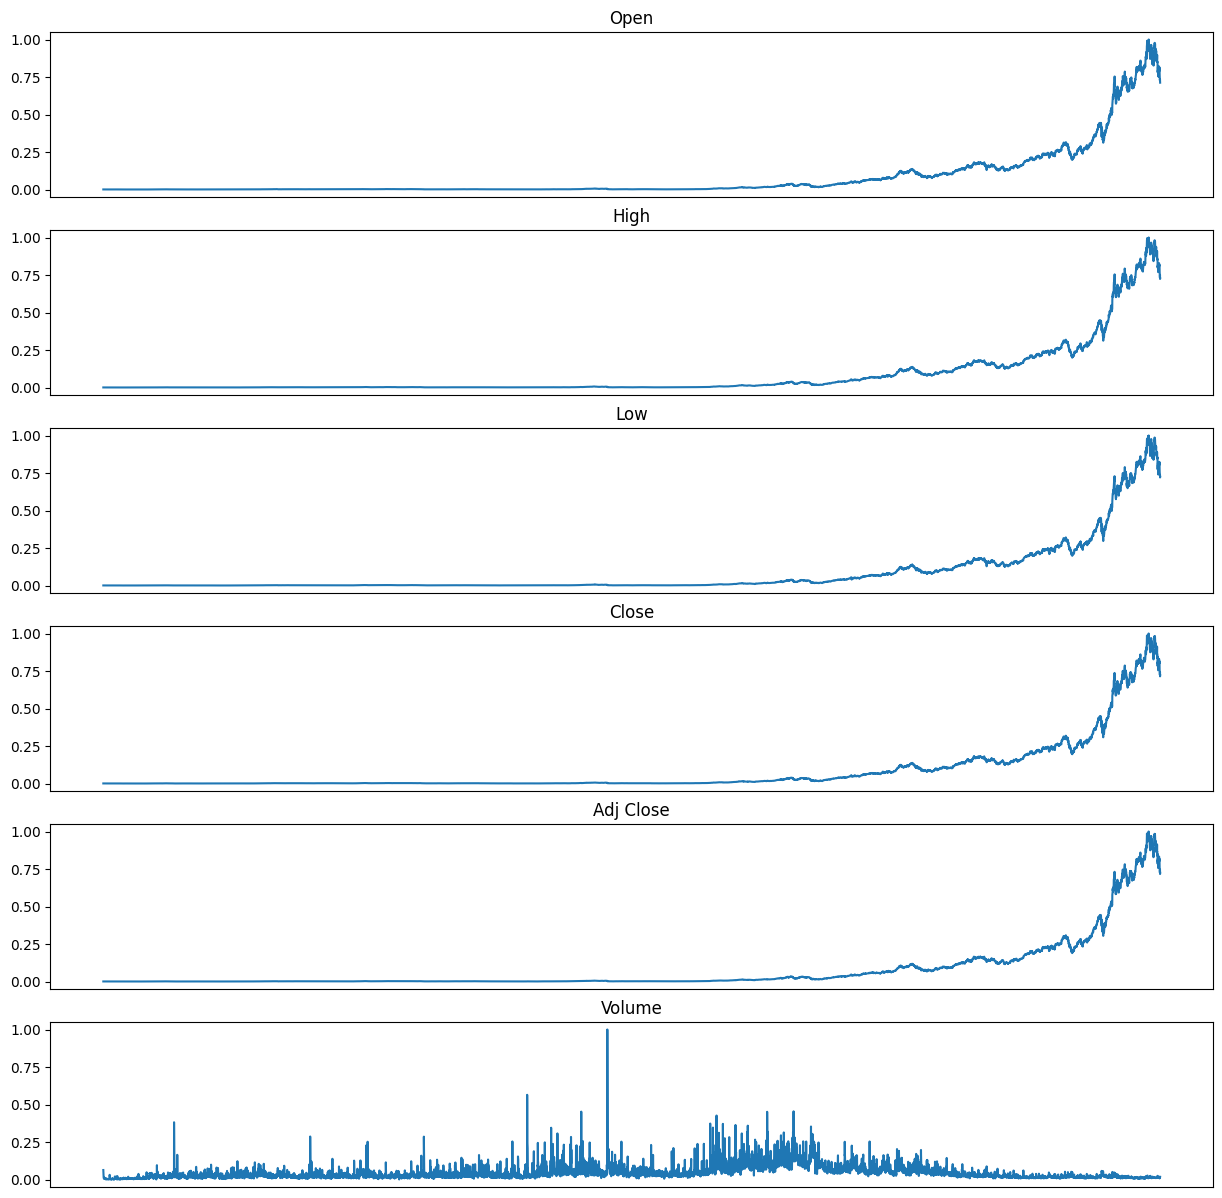

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
figure, axes = plt.subplots(6)

for axis, columns in zip(axes, df_scaled.columns):
  axis.plot(df_scaled[columns])
  axis.set_title(columns)
  axis.axes.xaxis.set_visible(False)

In [ ]:
# creating Sliding Window Sequnces

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(df['Close'], lags=100)

In [ ]:
window_size = 60
def create_sequence(data, window_size):
  X = []
  y = []
  for i in range(window_size, len(data)):
    X.append(data.iloc[i - window_size : i].values)
    y.append(data.iloc[i].values)
  return np.array(X), np.array(y)

X, y = create_sequence(df_scaled, window_size)

In [ ]:
X.shape, y.shape

((10408, 60, 6), (10408, 6))

In [ ]:
# Train-test split
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7285, 60, 6), (3123, 60, 6), (7285, 6), (3123, 6))

# Model Building

In [ ]:
LSTM_model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 64, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 64, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
LSTM_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['RootMeanSquaredError'])


In [ ]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [ ]:
history = LSTM_model.fit(X_train, y_train,   validation_split = 0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - RootMeanSquaredError: 0.0653 - loss: 0.0046 - val_RootMeanSquaredError: 0.0230 - val_loss: 5.2731e-04
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - RootMeanSquaredError: 0.0382 - loss: 0.0015 - val_RootMeanSquaredError: 0.0250 - val_loss: 6.2680e-04
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - RootMeanSquaredError: 0.0312 - loss: 9.7617e-04 - val_RootMeanSquaredError: 0.0196 - val_loss: 3.8584e-04
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - RootMeanSquaredError: 0.0302 - loss: 9.1980e-04 - val_RootMeanSquaredError: 0.0196 - val_loss: 3.8422e-04
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - RootMeanSquaredError: 0.0296 - loss: 8.7508e-04 - val_RootMeanSquaredError: 0.0244 - val_loss: 5.9399e-04
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - RootMeanSquaredError: 0.0286 - loss: 8.1923e-04 - val_RootMeanSquaredError: 0.0212 - val_loss: 4.5019e-04
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 3

# Predictions

In [ ]:
predictions = LSTM_model.predict(X_test)

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

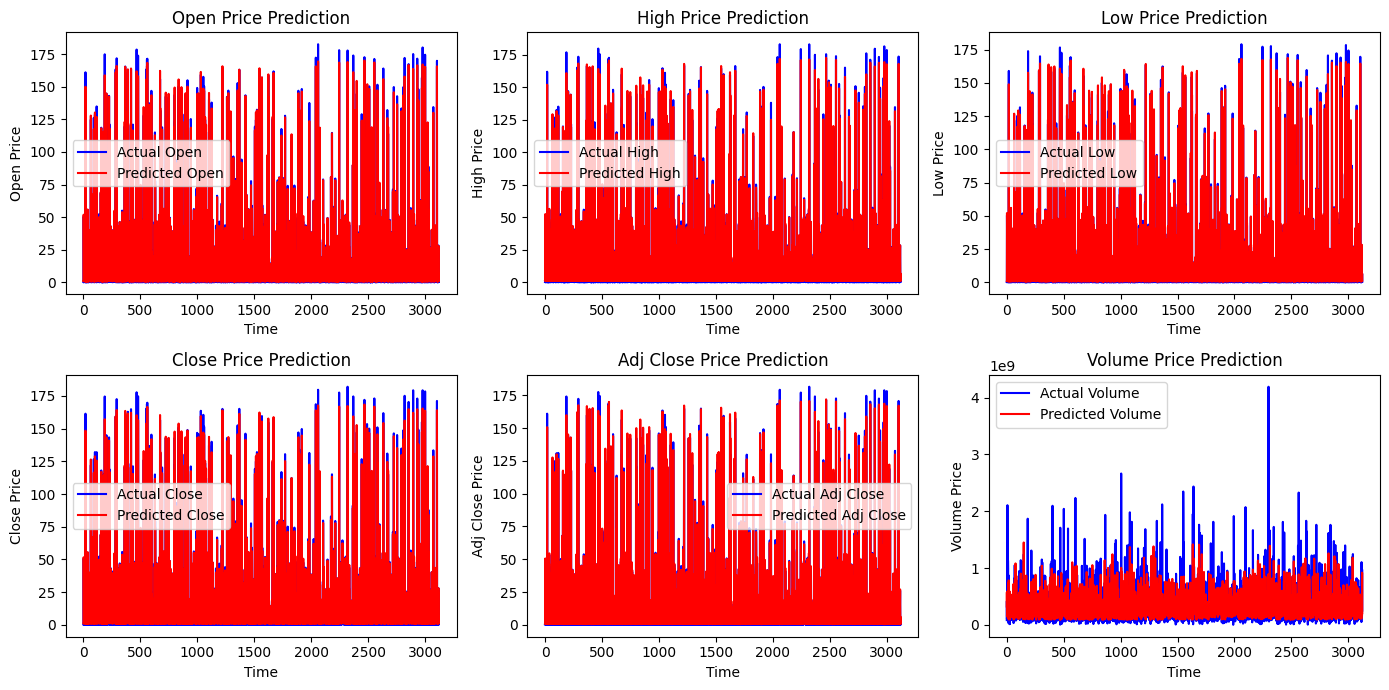

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 7))

for i, col in enumerate(df_scaled.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()


In [ ]:
def objective(trial):
    # Define search space
    seq_len = trial.suggest_int('seq_len', 30,60, 90)
    lstm_units = trial.suggest_int('lstm_units', 32, 256, step=32)
    num_layers = trial.suggest_int('num_layers', 1, 2, 3)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    epochs = 50  # we’ll rely on early stopping instead of fixed limit

    # Prepare data
    X_trains, y_trains = create_sequence(train_data, seq_len)
    X_tests, y_tests = create_sequence(test_data, seq_len)
    input_shape = (X_train.shape[1], X_train.shape[2])
    output_dim = y_train.shape[1]

    # Build model
    model = keras.Sequential()
    for i in range(num_layers):
        return_sequences = i < num_layers - 1
        model.add(layers.LSTM(
            lstm_units,
            return_sequences=return_sequences,
            dropout=dropout,
            input_shape=input_shape if i == 0 else None
        ))
    model.add(layers.Dense(output_dim))

    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')

    # EarlyStopping callback
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,           # stop if val_loss doesn’t improve for 5 epochs
        restore_best_weights=True
    )

    # Train with early stopping
    model.fit(X_trains, y_trains,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.2,
              verbose=0,
              callbacks=[early_stop])

    # Predict
    y_preds = model.predict(X_tests, verbose=0)

    # Inverse transform predictions
    y_pred_inv = scaler.inverse_transform(y_preds)
    y_test_inv = scaler.inverse_transform(y_tests)

    def root_mean_squared_error(y_true, y_pred):
     return np.sqrt(np.mean((y_true - y_pred) ** 2))

    rmse = root_mean_squared_error(y_test_inv, y_pred_inv)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Best hyperparameters:", study.best_params)


[I 2025-10-05 08:13:14,134] A new study created in memory with name: no-name-80544123-8af9-4cd6-b6e8-9b3136be131f
/tmp/ipython-input-252405212.py:3: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  seq_len = trial.suggest_int('seq_len', 30,60, 90)
/usr/local/lib/python3.12/dist-packages/optuna/distributions.py:702: UserWarning: The distribution is specified by [30, 60] and step=90, but the range is not divisible by `step`. It will be replaced by [30, 30].
  warnings.warn(
/tmp/ipython-input-252405212.py:5: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be give

ValueError: No trials are completed yet.